# Macchine a vettori di supporto
## Caso separabile linearmente
Si assuma per il momento che le due classi con etichette $+1$ e $-1$ siano linearmente separabili dall'iperpiano:
$$H:w\cdot x+w_0=0$$

L'idea alla basa è quella di trovare un iperpiano che divida le classi in modo da massimizzare il **margine**, cioè la distanza tra l'iperpiano e i punti più vicini, chiamati **vettori di supporto**. Maggiore è il margine, maggiore sarà la capacità di generalizzare con nuovi dati.

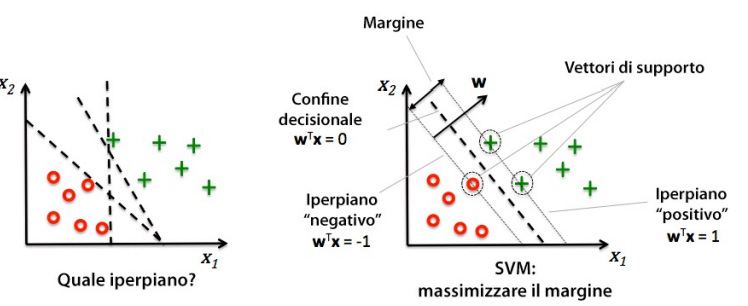

Per alcuni esempi della classe $+1$ definiamo:
$$H^+:w\cdot x^+ + w_0 = +1$$

Per alcuni esempi della classe $-1$ definiamo:
$$H^-:w\cdot x^- + w_0 = -1$$

Gli esempi $x^+$ e $x^-$ sono i vettori di supporto. Si vuole massimizzare la distanza tra gli iperpiani paralleli si vuole massimizzare la distanza tra $H^+$ e $H^-$, ovvero massimizzare il margine in modo da abbassare l'errore di generalizzazione.



La distanza tra $H^+$ e $H^-$ la possiamo vedere come la distanza di $x^+$ da $H$ più la distanza di $x^-$ e $H$
$$d=\frac{w\cdot x^+}{||w||}-\frac{w\cdot x^-}{||w||}$$

> Il secondo termine è negativo perché la distanza è negativa siccome il punto si trova nell'iperspazio negativo.

Dalle definizioni di $H^+$ e $H^-$ abbiamo che:
$$d=\frac{1-w_0}{||w||}-\frac{-1-w_0}{||w||}=\frac{2}{||w||}$$

Dunque l'obiettivo è massimizzare $\frac{2}{||w||}$

Poiché $||w||$ contiene una radice (essendo la norma di un vettore) conviene ottimizzare il quadrato e passare al reciproco, minimizzandolo. Dunque la funzione obiettivo diventa:
$$\frac{1}{2}||w||^2$$

con i vincoli ovviamente che gli esempi siano classificati correttamente, ovvero $\forall \bold{x}^{(i)} \ $ con $i=1,...,n$:
$$y_i(w\cdot \bold{x}^{(i)}+w_0)\geq 1$$


## Caso non separabile linearmente
In questo caso il vincolo precedente non può essere rispettato e il problema non ammette soluzioni. In tal caso si ammorbidiscono i vincoli, introducendo $n$ variabili positive dette *slack* nel seguente modo:
$$w \cdot x^{(i)}+w_0\geq 1 - \xi^{(i)}  \text{ se } y^{(i)}=1$$

$$w \cdot x^{(i)}+w_0\geq -1 + \xi^{(i)}  \text{ se } y^{(i)}=-1$$

$$\xi^{(i)}\geq 0$$

Quindi la funzione obiettivo diventa:
$$\frac{1}{2}||w||^2+C\sum_{i=1}^n \xi^{(i)}$$

Dove $C$ è un iperparametro che possiamo usare per controllare quanto penalizzare le classificazioni errate.

Questo problema può essere risolto con tecniche di programmazione quadratica ma anche con discesa del gradiente ma allo scopo dobbiamo eliminare i vincoli.



### Hinge loss 
Per l'eliminazione dei vincoli.
L'eliminazione dei vincoli nella precedente formulazione passa attraverso la sostituzione delle variabili $\xi^{(i)}$ con delle funzioni 'cerniera' che valgono $0$ in caso di classificazione corretta e crescono linearmente man mano che aumenta l'errore.

$$\xi^{(i)}=\max (0,1-y^{(i)}(w\cdot x^{(i)}+w_0))$$

Nel caso di classificazione corretta $y^{(i)}(w\cdot x^{(i)}+w_0)\geq 1$ quindi $\xi^{(i)}$ vale $0$, altrimenti diventa via via più grande man mano che $y^{(i)}(w\cdot x^{(i)}+w_0)$ si allontana da $1$ verso sinistra.

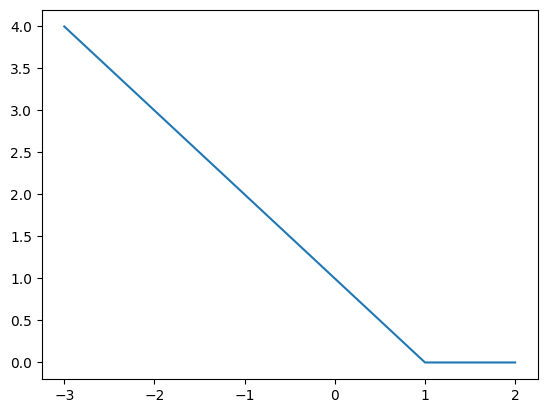

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def xi(z):
    return max(0, 1-z)

z_val = np.arange(-3, 3, 1)
plt.plot(z_val, [xi(z) for z in z_val])

Pertanto la funzione obiettivo diventa:
$$J(w)=\frac{1}{2}||w||^2+C\sum_{i=1}^n \max(0,1-y^{(i)}(w\cdot x^{(i)}+w_0))$$



### Discesa del gradiente
Calcoliamo le derivate parziali di $J(w)$
$$\frac{d}{d w_j}=w_j+C \frac{d}{dw_j}\sum_{i=1}^n \max(0,1-y^{(i)}(w\cdot x^{(i)}+w_0))$$

La derivata della sommatoria non può essere generalizzata perché dipende dal segno di 
$$1-y^{(i)}(w\cdot x^{(i)}+w_0)$$

Dunque scriviamo:
$$\frac{d J(w)}{d w_j}=\begin{cases}
    w_j \text{ Se } 1-y^{(i)}(w\cdot x^{(i)}+w_0)<0\\
    w_j - C(y^{(i)}x_j^{(i)}) \text{ Se } 1-y^{(i)}(w\cdot x^{(i)}+w_0)\geq 0
\end{cases}$$

Ricordando la regola di aggiornamento dei pesi $w$ e usando un approccio stocastico per ogni esempio $\bold{x}^{(i)}$:

$$w \leftarrow \begin{cases}
    w - \eta w \text{ Se } y^{(i)}(w\cdot x^{(i)}+w_0)>1\\
    w - \eta(w-C(y^{(i)}x^{(i)})) \text{ Altrimenti }
\end{cases}$$





In [2]:
import os
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from time import time


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', '*', 'o', '^', 'v', '*')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## Codice SVM

In [7]:
class SVM(object):
    """Support Vector Machine (SVM) classifier using gradient descent."""

    
    def __init__(self, eta=0.01, n_iter=1000, C=1.0, random_state=1, tol=1e-4, verbose=True):
        self.eta = eta  # Learning rate
        self.n_iter = n_iter  # Number of iterations
        self.C = C  # Regularization parameter
        self.random_state = random_state
        self.tol = tol  # Tolerance for early stopping
        self.verbose = verbose  # Print iterations
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.last_cost = None
        
        for count in range(self.n_iter):
            cost = 0
            for xi, yi in zip(X, y):
                margin = yi * (np.dot(xi, self.w_[1:]) + self.w_[0])
                
                if margin >= 1:
                    self.w_ -= self.eta * self.w_  # Only regularization term
                else:
                    self.w_[1:] -= self.eta * (self.w_[1:] - self.C * yi * xi)  # Full gradient update
                    self.w_[0] -= self.eta * (-self.C * yi)
                
                cost += max(0, 1 - margin)  # Hinge loss
            
            if self.last_cost is not None and abs(cost - self.last_cost) < self.tol:
                if self.verbose:
                    print(f'Uscita anticipata dopo {count} iterazioni')
                break
            self.last_cost = cost
        
        return self
    
    def predict(self, X):
        return np.where(np.dot(X, self.w_[1:]) + self.w_[0] >= 0, 1, -1)

In [8]:
s = os.path.join('dataset', 'iris.data')
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

### Esempio Separabile

In [9]:
# [0:50] iris-setosa
# [50:100] iris-versicolor
# [100:150] iris-virginica
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-versicolor', 1, -1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

X_std = (X-X.mean(0))/X.std(0)

Accuratezza: 1.0 
	Secondi: 0.29758429527282715


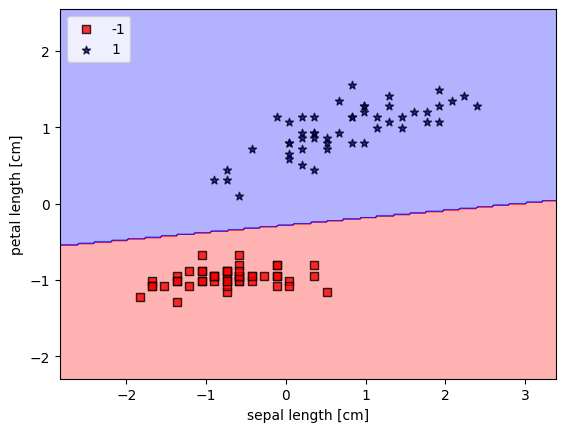

In [10]:
start_time = time()
svm = SVM(eta=0.001, C=100, n_iter=1000, tol=0.01).fit(X_std, y)
end_time = time()
accuracy = np.mean(svm.predict(X_std) == y)
print('Accuratezza:', accuracy, '\n\tSecondi:', end_time-start_time)

plot_decision_regions(X_std, y, classifier=svm)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

### Esempio non separabile

In [11]:
# [0:50] iris-setosa
# [50:100] iris-versicolor
# [100:150] iris-virginica
y = df.iloc[50:, 4].values
y = np.where(y == 'Iris-versicolor', 1, -1)

# extract sepal length and petal length
X = df.iloc[50:, [0, 2]].values

X_std = (X-X.mean(0))/X.std(0)

Uscita anticipata dopo 7 iterazioni
Accuratezza: 0.9 
	Secondi: 0.1552894115447998


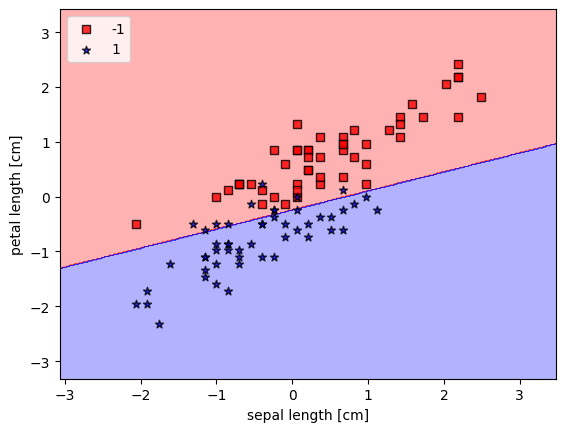

In [12]:
start_time = time()
svm = SVM(eta=0.001, C=100, n_iter=1000, tol=0.01).fit(X_std, y)
end_time = time()
accuracy = np.mean(svm.predict(X_std) == y)
print('Accuratezza:', accuracy, '\n\tSecondi:', end_time-start_time)

plot_decision_regions(X_std, y, classifier=svm)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')